# **DATASET UPLOADING WITH GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the path to your dataset file in Google Drive
file_path = "/content/drive/My Drive/PR_assignment/predictive_maintenance.csv"

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)




# **Display dataset information**

Dataset Shape: (10000, 10)

Columns: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

Data Types:
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

Summary Statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.7

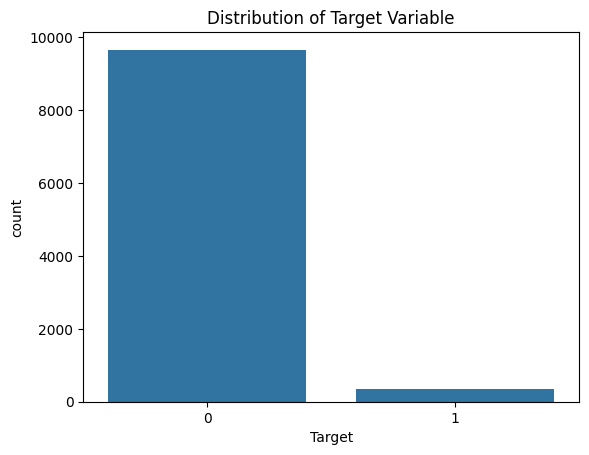

In [ ]:
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing the distribution of target variable
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


In [ ]:
# Normalizing or Standardizing Numeric Features
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for normalization
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize numeric features
data_scaled = data.copy()  # Make a copy of the original data
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the first few rows of the normalized dataset
data_scaled.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,-1.731878,M14860,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322,No Failure
1,-1.731531,L47181,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,No Failure
2,-1.731185,L47182,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,No Failure
3,-1.730838,L47183,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,No Failure
4,-1.730492,L47184,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,No Failure


## **Feature Selection/Extraction**

In [ ]:
selected_features = ['Air temperature [K]', 'Process temperature [K]',
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Subset the dataset with selected features
data_selected = data_scaled[selected_features]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Specify the number of components you want to reduce to

# Apply PCA to the selected features
data_pca = pca.fit_transform(data_selected)

# Convert the PCA result back to a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PCA Component 1', 'PCA Component 2'])

# Display the first few rows of the PCA-transformed dataset
data_pca.head()



,PCA Component 1,PCA Component 2
0,-1.093847,0.854210
1,-1.602678,0.215765
2,-1.599406,0.401641
3,-1.230438,0.664604
4,-1.289814,0.535153


# **Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


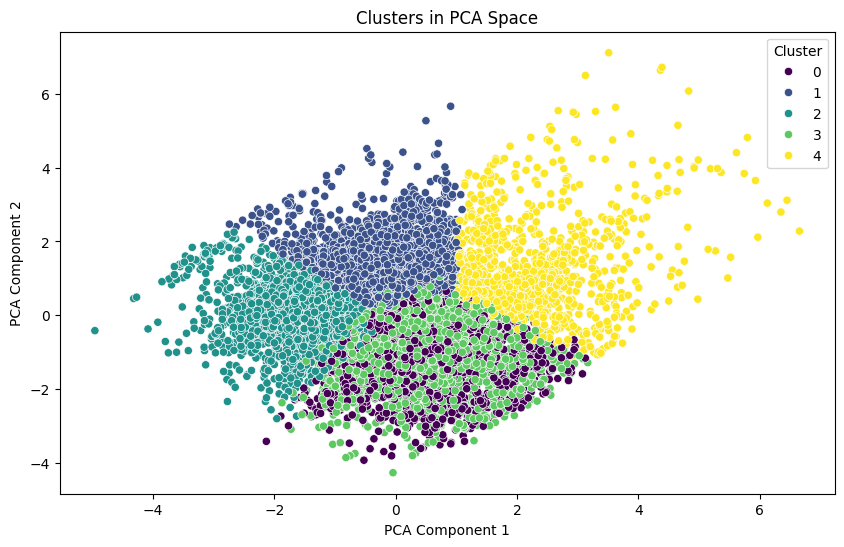

Silhouette Score: 0.22492951329585184


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters (you can experiment with different values)
num_clusters = 5

# Create KMeans object
kmeans = KMeans(n_clusters=num_clusters)

# Fit KMeans clustering on the selected features
clusters = kmeans.fit_predict(data_selected)

# Add cluster labels to the PCA-transformed dataset
data_pca['Cluster'] = clusters

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster', data=data_pca, palette='viridis', legend='full')
plt.title('Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Evaluate the performance of clustering
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(data_selected, clusters)
print(f"Silhouette Score: {silhouette_avg}")


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00


# **Model Development With decision tree model**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 - F1 Score: 0.9908675799086758
Cluster 1 - F1 Score: 0.9692778293538135
Cluster 2 - F1 Score: 0.9568965517241379
Cluster 3 - F1 Score: 0.9883014189282272
Cluster 4 - F1 Score: 0.984590963627545


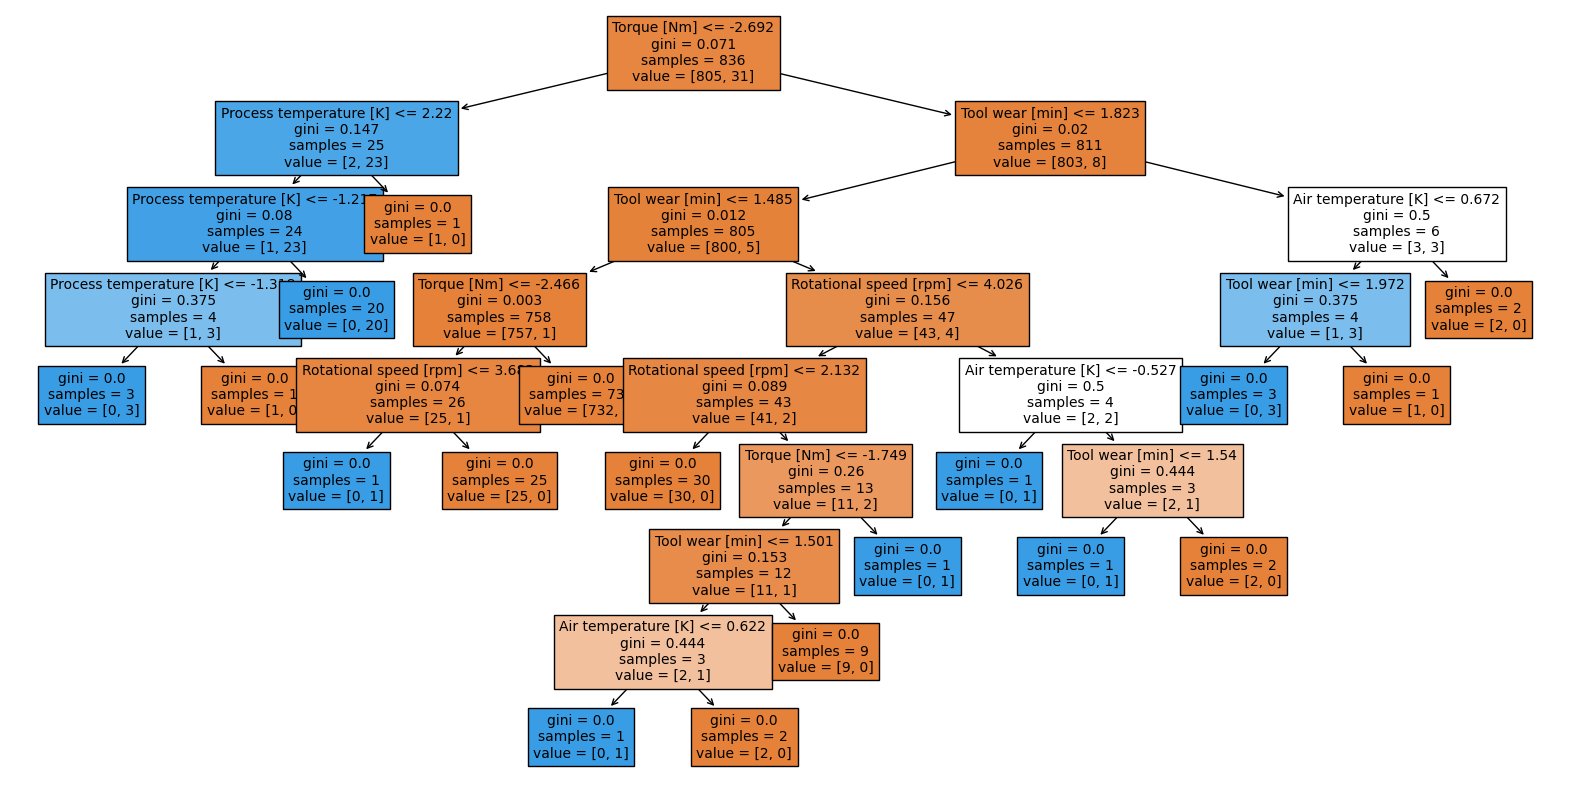

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import optuna
import pandas as pd

# Load the dataset
file_path = "/content/drive/My Drive/PR_assignment/predictive_maintenance.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns if needed
data.drop(['UDI', 'Product ID', 'Type', 'Failure Type'], axis=1, inplace=True)

# Step 2: Normalizing or Standardizing Numeric Features
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for normalization
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize numeric features
data_scaled = data.copy()  # Make a copy of the original data
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

num_clusters = 5

# Select relevant features for clustering
selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
data_selected = data_scaled[selected_features]

# Create KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering on the selected features
clusters = kmeans.fit_predict(data_selected)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, clusters_train, clusters_test = train_test_split(data_selected, data['Target'], clusters, test_size=0.2, random_state=42)

# Train separate decision tree models for each cluster
models = {}  # Dictionary to store models for each cluster
for cluster_label in range(num_clusters):
    # Filter data for the current cluster
    X_train_cluster = X_train[clusters_train == cluster_label]
    y_train_cluster = y_train[clusters_train == cluster_label]

    # Create decision tree classifier
    model = DecisionTreeClassifier(random_state=42)

    # Train the model
    model.fit(X_train_cluster, y_train_cluster)

    # Store the model in the dictionary
    models[cluster_label] = model

# Evaluate the performance of each model on the test set
for cluster_label, model in models.items():
    # Filter test data for the current cluster
    X_test_cluster = X_test[clusters_test == cluster_label]
    y_test_cluster = y_test[clusters_test == cluster_label]

    # Predictions
    y_pred = model.predict(X_test_cluster)

    # Calculate F1 score
    f1 = f1_score(y_test_cluster, y_pred, average='weighted')
    print(f"Cluster {cluster_label} - F1 Score: {f1}")

# Display the Decision Tree for the best model
best_cluster_label = max(models, key=lambda k: models[k].score(X_test[clusters_test == k], y_test[clusters_test == k]))
best_model = models[best_cluster_label]
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=selected_features, filled=True, fontsize=10)
plt.show()


# **RESULTS**

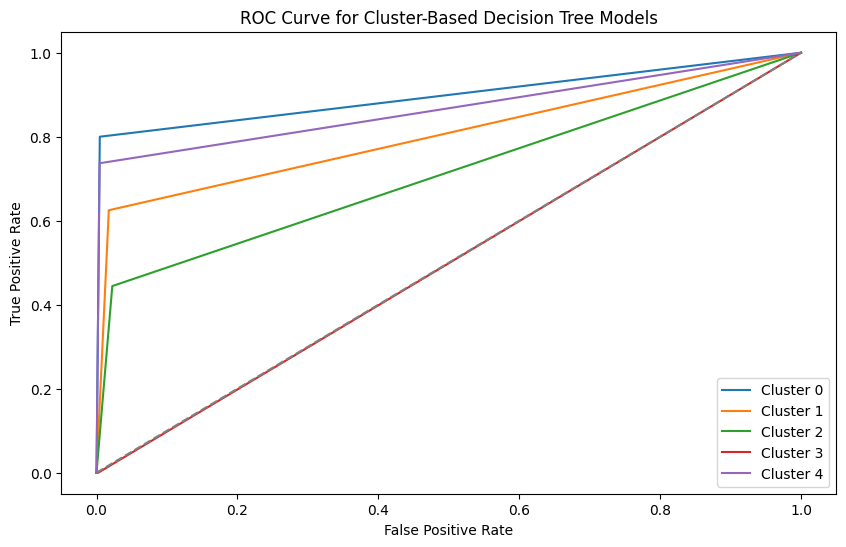

In [ ]:
from sklearn.metrics import roc_curve, auc

# Initialize lists to store FPR, TPR, and thresholds for each cluster
all_fpr = []
all_tpr = []
all_thresholds = []

# Calculate ROC curve for each cluster
for cluster_label, model in models.items():
    # Filter test data for the current cluster
    X_test_cluster = X_test[clusters_test == cluster_label]
    y_test_cluster = y_test[clusters_test == cluster_label]

    # Predict probabilities for each class
    y_proba = model.predict_proba(X_test_cluster)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_cluster, y_proba[:, 1])  # Use probabilities of class 1
    roc_auc = auc(fpr, tpr)

    # Store FPR, TPR, and thresholds
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_thresholds.append(thresholds)

# Plot ROC curve for each cluster
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.plot(all_fpr[i], all_tpr[i], label=f'Cluster {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot diagonal (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cluster-Based Decision Tree Models')
plt.legend()
plt.show()


# **Evaluation**

Cluster 0 - ROC-AUC: 0.53
Cluster 0 - Accuracy: 0.97
Cluster 0 - Precision: 0.96
Cluster 0 - Recall: 0.97
Cluster 0 - F1-score: 0.96


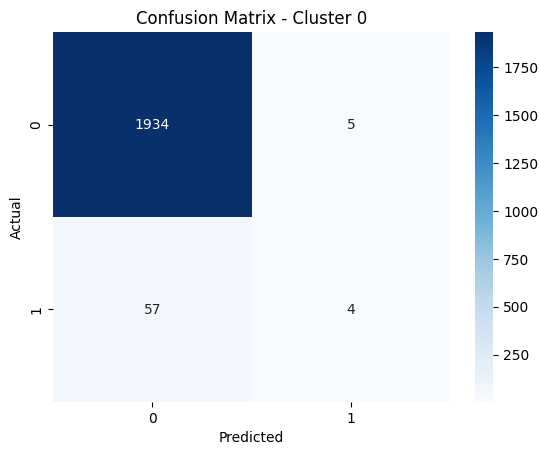

Cluster 1 - ROC-AUC: 0.67
Cluster 1 - Accuracy: 0.97
Cluster 1 - Precision: 0.97
Cluster 1 - Recall: 0.97
Cluster 1 - F1-score: 0.97


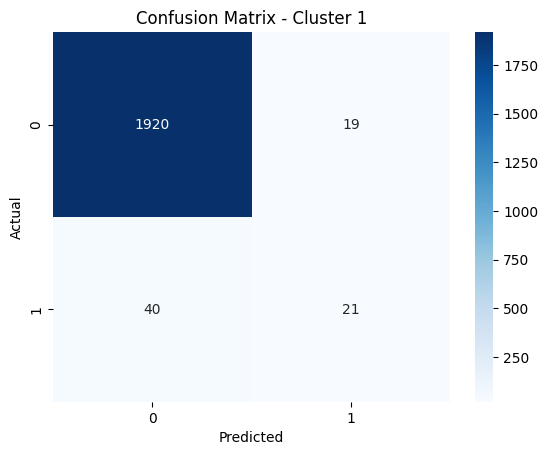

Cluster 2 - ROC-AUC: 0.69
Cluster 2 - Accuracy: 0.96
Cluster 2 - Precision: 0.96
Cluster 2 - Recall: 0.96
Cluster 2 - F1-score: 0.96


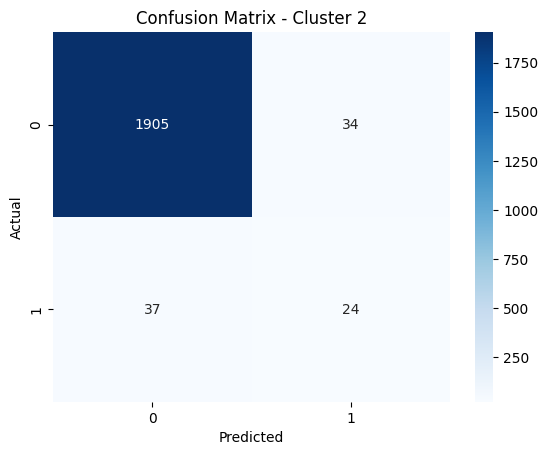

Cluster 3 - ROC-AUC: 0.60
Cluster 3 - Accuracy: 0.94
Cluster 3 - Precision: 0.95
Cluster 3 - Recall: 0.94
Cluster 3 - F1-score: 0.94


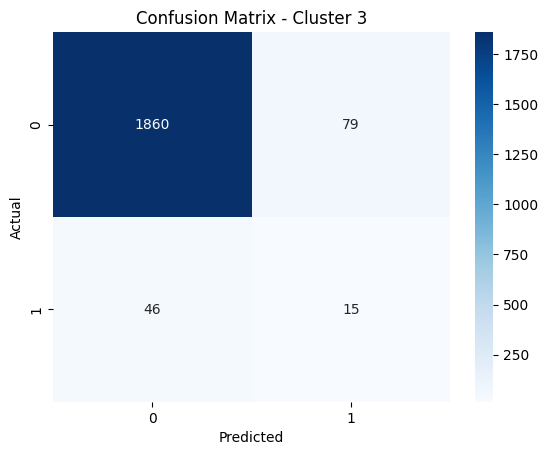

Cluster 4 - ROC-AUC: 0.70
Cluster 4 - Accuracy: 0.96
Cluster 4 - Precision: 0.96
Cluster 4 - Recall: 0.96
Cluster 4 - F1-score: 0.96


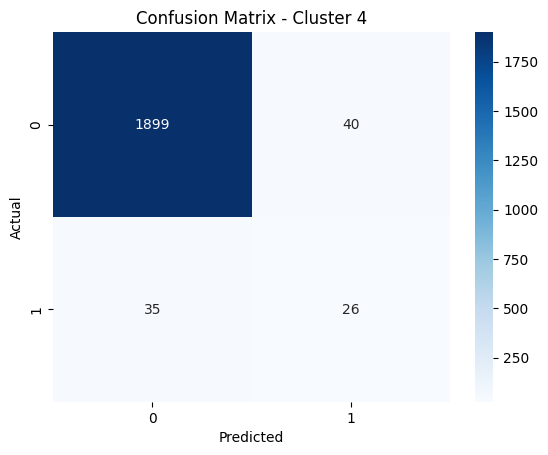

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define function to evaluate the performance of the predictive maintenance system
def evaluate_performance(models, X_test, y_test):
    for cluster_label, model in models.items():
        # Predict labels
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # If binary classification, calculate ROC-AUC
        if len(set(y_test)) == 2:
            if hasattr(model, 'predict_proba'):
                y_prob = model.predict_proba(X_test)[:, 1]
                roc_auc = roc_auc_score(y_test, y_prob)
                print(f"Cluster {cluster_label} - ROC-AUC: {roc_auc:.2f}")

        # Print evaluation metrics
        print(f"Cluster {cluster_label} - Accuracy: {accuracy:.2f}")
        print(f"Cluster {cluster_label} - Precision: {precision:.2f}")
        print(f"Cluster {cluster_label} - Recall: {recall:.2f}")
        print(f"Cluster {cluster_label} - F1-score: {f1:.2f}")

        # Visualize confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix - Cluster {cluster_label}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

# Evaluate performance
evaluate_performance(models, X_test, y_test)
